# Image Reduction Pipeline Guide
This notebook demonstrates the usage of data reduction pipline class "image_reduction".

# Extract data from DR

I saved the image reduction results in the pickle file. Following is the guide to extract data from DR

In [25]:
### Extract data from DR ###
# The DR is stored in the pickle structure. To load the data:

from pickle import *

inst = 1 # 1: I band, H: band
drdir = '/Users/ytcheng/Desktop/CIBER1_40030_dr200613/' # path to dr data

# load data
with open(drdir + 'dr40030_TM%d_200613.pkl'%inst, "rb") as f:
    dr = pickle.load(f)

# The DR has data in five fields: 
# 4:'elat10'
# 5:'elat30'
# 6:'BootesB'
# 7:'BootesA'
# 8:'SWIRE'

# Each field has the following attributes:

# 'name': name of the field
# 'cf_G1': G1 cal factor, (e-/s) / (ADU/fr)
# 'cf_G2': G1 cal factor, (nW/m2/sr) / (e-/s)
# 'cf': cal factor G1G2, (nW/m2/sr) / (ADU/fr)
# 'Nfr': number of frame used in this field
# 'rawmap': line fit w/o linearization [ADU/fr]
# 'rawmask': DC inst mask * negative pixel mask * ts mask
# 'DCmap': DC map [ADU/fr]
# 'DCsubmap': linearized map - DC template [ADU/fr]
# 'FFpix': FF from stacking off fields. It takes NaNs values at pix w/o FF info
# 'FFsm': FFpix smoothed with 3pix Gaussian kernel to fill in NaNs
# 'FF': final FF estimator. FFpix with NaNs filled with FFsm 
# 'mask_inst': final instrument mask. rawmask * crmask * sigma clip mask
# 'strmask': source mask (m < 20)
# 'strnum': source num
# 'map': final image after FF corr [ADU/fr]
# 'srcmap': source map from PanSTARRS & 2MASS bright sources [nW/m2/sr]
# 'cbmap': mean sub 'map' with mask_inst * strmask [nW/m2/sr]
# 'psmap': mean sub 'srcmap' with mask_inst * strmask [nW/m2/sr]
# 'mean_cb': mean intensity in CIBER image after masking with strmask and mask_inst [nW/m2/sr]
# 'mean_ps': mean intensity in srcmap image after masking with strmask and mask_inst [nW/m2/sr]
# 'cbgradmap': a 2D gradient (1st order polynominal) fit to CIBER image


# For example, to get the 'rawmap' in elat10
ifield = 4
rawmap = dr[ifield]['rawmap']

***
# Run analysis pipeline
This section is a guide for running the image reduction pipeline
## Prerequisites
add a script in the same directory named 'ciber_info.py' with the following dictionary point to the paths.

In [ ]:
mypaths = {'DCdir': '', # path to DCdir
           'framedir':'',# path to framedir*
           'alldat':'', # path to alldat
           'PScatdat':'',# path to PanSTARRS
           '2Mcatdat':'', # path to PSC
          }
# * download frame data to framdir from ciber0:/data/CIBER/data/40030/framedata/TM1* TM2*

## Run Reduction

The reduction is done by the class 'image_reduction'. Its _ _init_ _ function calls the the to perform the data reduction. The get_psf, get_strmask, and get_srcmap steps are very time consuming, so if you already have the results stored in 'allat' directory, the function will load those results instead of running those process again.

In [29]:
from reduction import *
import pickle

# This will run the reduction code and save the processed info in the dictionary
# 1 - I band, 2 - H band

data_maps = {1:image_reduction(1), 2:image_reduction(2)}

The wrapper function 'load_processed_images' can be called to get the data

In [30]:
from utils import *

# Example: get cbmap and strmask in I band(inst=1) elat10 (ifield=4)

cbmap, strmask = load_processed_images(data_maps, return_names=[(1,4,'cbmap'), (1,4,'strmask')])

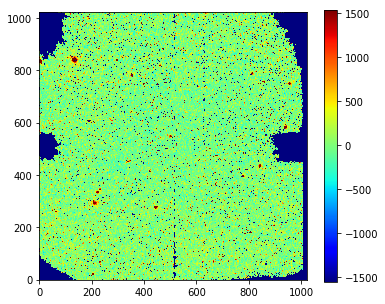

In [31]:
imageclip(cbmap)

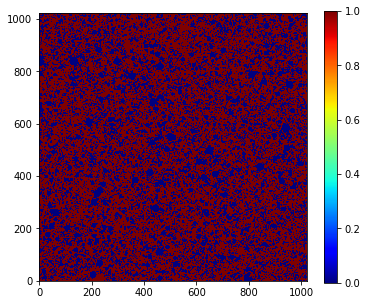

In [32]:
imageclip(strmask)